# Craft Beer Data

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# getting the beer data from a csv file
df = pd.read_csv('beers.csv')

In [3]:
df.head() # check_yo_head

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
# checking on the tail of the data
df.tail()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0
2409,2409,0.052,NaN,84,Rail Yard Ale (2009),American Amber / Red Ale,424,12.0


In [5]:
# taking a look at the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [6]:
# taking a look at the shape of the data
df.shape

(2410, 8)

Initial Takeaways:

- So it looks like there are 8 columns 

- The unnamed column is a count of the data for both .csv files

- Some of the ibu has data and some don't

- I don't know what the id column is for

In [7]:
# prep

# df.drop(columns = 'Unnamed: 0', )

In [8]:
# reading the breweries csv file
df_1 = pd.read_csv('breweries.csv')

In [9]:
df_1.head() #check_yo_head

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [10]:
# using merge function by setting how='inner'
df = pd.merge(df, df_1, 
                   on='Unnamed: 0', 
                   how='inner')

In [11]:
df.head() #check_yo_head

,Unnamed: 0,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,NorthGate Brewing,Minneapolis,MN
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,Against the Grain Brewery,Louisville,KY
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,Jack's Abby Craft Lagers,Framingham,MA
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,Mike Hess Brewing Company,San Diego,CA
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,Fort Point Beer Company,San Francisco,CA


In [12]:
# checking for nulls in the data
df.isna().sum()

Unnamed: 0      0
abv            16
ibu           272
id              0
name_x          0
style           0
brewery_id      0
ounces          0
name_y          0
city            0
state           0
dtype: int64

In [13]:
# taking a look at the shape of the merged data
df.shape

(558, 11)

In [14]:
# quick info on the merged data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  558 non-null    int64  
 1   abv         542 non-null    float64
 2   ibu         286 non-null    float64
 3   id          558 non-null    int64  
 4   name_x      558 non-null    object 
 5   style       558 non-null    object 
 6   brewery_id  558 non-null    int64  
 7   ounces      558 non-null    float64
 8   name_y      558 non-null    object 
 9   city        558 non-null    object 
 10  state       558 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 52.3+ KB


In [15]:
# renaming columns for readability
df = df.rename(columns = {"style": "beer_style", "name_y": "brewery", "Unnamed: 0": "number", "name_x": "beer"})

In [16]:
df.head() #check_yo_head

,number,abv,ibu,id,beer,beer_style,brewery_id,ounces,brewery,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,NorthGate Brewing,Minneapolis,MN
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,Against the Grain Brewery,Louisville,KY
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,Jack's Abby Craft Lagers,Framingham,MA
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,Mike Hess Brewing Company,San Diego,CA
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,Fort Point Beer Company,San Francisco,CA


<AxesSubplot:>

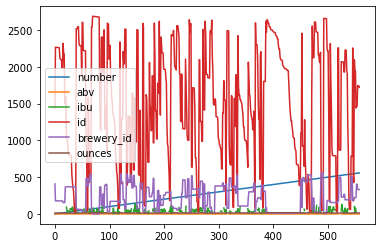

In [17]:
# messing around and dropping a .plot() on the data
df.plot()

In [18]:
# taking a look at the counts of each beer style
df.beer_style.value_counts()

American IPA                      88
American Pale Ale (APA)           54
American Amber / Red Ale          33
American Blonde Ale               25
American Double / Imperial IPA    24
                                  ..
Doppelbock                         1
Bock                               1
Scotch Ale / Wee Heavy             1
American Barleywine                1
Euro Pale Lager                    1
Name: beer_style, Length: 77, dtype: int64

In [19]:
# looking to see if the same brewery has multiple beers
df.brewery.value_counts()

Sly Fox Brewing Company                2
Oskar Blues Brewery                    2
Otter Creek Brewing                    2
Blackrocks Brewery                     2
Blue Mountain Brewery                  2
                                      ..
Catawba Island Brewing                 1
Alltech's Lexington Brewing Company    1
Uncle Billy's Brewery and Smokeh...    1
Seattle Cider Company                  1
Great Crescent Brewery                 1
Name: brewery, Length: 551, dtype: int64

In [20]:
# df.shape had 558 rows
# seeing how many different breweries there are
df.brewery.nunique()

551

In [21]:
# seeing how many unique beers there are
df.beer.nunique()

542

In [22]:
# looking at the amount of beer per state
df.state.value_counts()

 CO    47
 CA    39
 MI    32
 OR    29
 TX    28
 PA    25
 WA    23
 MA    23
 IN    22
 WI    20
 NC    19
 IL    18
 NY    16
 VA    16
 FL    15
 OH    15
 MN    12
 AZ    11
 VT    10
 MO     9
 MT     9
 ME     9
 CT     8
 GA     7
 MD     7
 AK     7
 OK     6
 LA     5
 NE     5
 IA     5
 ID     5
 RI     5
 KY     4
 UT     4
 WY     4
 SC     4
 HI     4
 NM     4
 NJ     3
 AL     3
 KS     3
 NH     3
 TN     3
 DE     2
 AR     2
 NV     2
 MS     2
 SD     1
 ND     1
 WV     1
 DC     1
Name: state, dtype: int64

<AxesSubplot:>

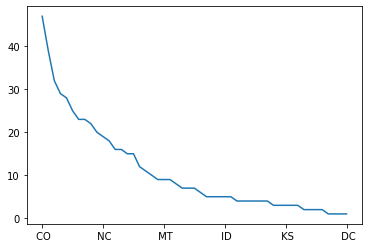

In [23]:
# trying out a .plot() on the states
df.state.value_counts().plot()

In [24]:
state_df = df.state.value_counts().rename_axis('states').reset_index(name='breweries')
state_df.head(5)

,states,breweries
0,CO,47
1,CA,39
2,MI,32
3,OR,29
4,TX,28


Text(0.5, 1.0, 'Brewery Haters')

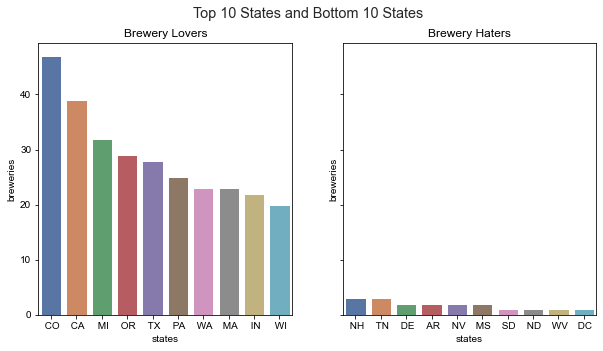

In [25]:
# Visualization

fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
sns.set_theme(style="whitegrid")
fig.suptitle('Top 10 States and Bottom 10 States')

# Top 10 States
sns.barplot(ax=axes[0], x="states", y="breweries", data=state_df.head(10))
axes[0].set_title("Brewery Lovers")

# Bottom 10 States
sns.barplot(ax=axes[1], x="states", y="breweries", data=state_df.tail(10))
axes[1].set_title("Brewery Haters")

In [26]:
df.head()

,number,abv,ibu,id,beer,beer_style,brewery_id,ounces,brewery,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,NorthGate Brewing,Minneapolis,MN
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,Against the Grain Brewery,Louisville,KY
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,Jack's Abby Craft Lagers,Framingham,MA
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,Mike Hess Brewing Company,San Diego,CA
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,Fort Point Beer Company,San Francisco,CA


In [28]:
top_beer = df.beer_style.value_counts().rename_axis('beer_type').reset_index(name='total')
top_beer.head()

,beer_type,total
0,American IPA,88
1,American Pale Ale (APA),54
2,American Amber / Red Ale,33
3,American Blonde Ale,25
4,American Double / Imperial IPA,24


Text(0.5, 1.0, 'Top Flight Beers')

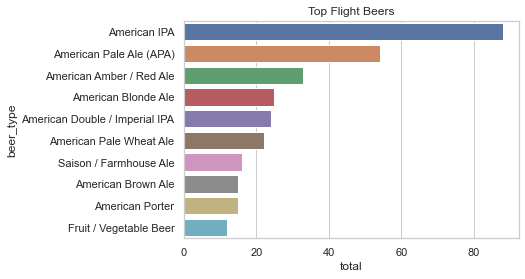

In [33]:
sns.barplot(x='total', y='beer_type', data=top_beer.head(10))
plt.title('Top Flight Beers')
